In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv('kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [4]:
df=pd.get_dummies(data=df,columns=['Kyphosis'],drop_first=True)

In [5]:
df.head()

,Age,Number,Start,Kyphosis_present
0,71,3,5,0
1,158,3,14,0
2,128,4,5,1
3,2,5,1,0
4,1,4,15,0


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


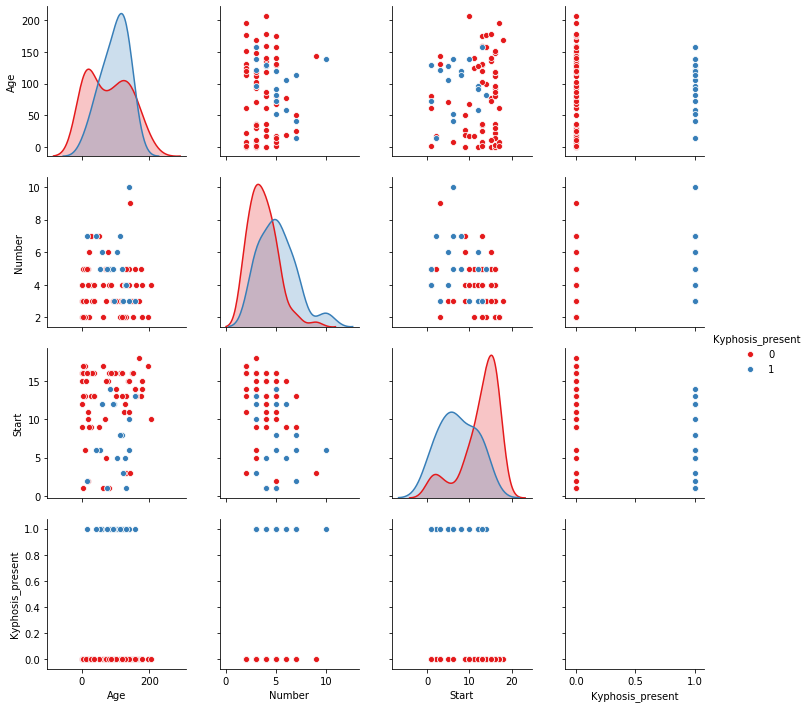

In [9]:
sns.pairplot(df,hue='Kyphosis_present',palette='Set1')

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
scaler=MinMaxScaler()

In [12]:
from sklearn.model_selection import train_test_split

In [15]:
X=df.drop('Kyphosis_present',axis=1)
y=df['Kyphosis_present']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [17]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [18]:
from sklearn.ensemble import RandomForestClassifier

In [19]:
rfc=RandomForestClassifier(n_estimators=500)

In [20]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [21]:
pred=rfc.predict(X_test)

In [22]:
from sklearn.metrics import confusion_matrix,classification_report

In [23]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[17  0]
 [ 6  2]]
              precision    recall  f1-score   support

           0       0.74      1.00      0.85        17
           1       1.00      0.25      0.40         8

    accuracy                           0.76        25
   macro avg       0.87      0.62      0.62        25
weighted avg       0.82      0.76      0.71        25



In [24]:
from xgboost import XGBClassifier

In [25]:
xgb=XGBClassifier(n_estimators=500)

In [26]:
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

In [27]:
pred_xgb=xgb.predict(X_test)

In [28]:
print(confusion_matrix(y_test,pred_xgb))
print(classification_report(y_test,pred_xgb))

[[16  1]
 [ 6  2]]
              precision    recall  f1-score   support

           0       0.73      0.94      0.82        17
           1       0.67      0.25      0.36         8

    accuracy                           0.72        25
   macro avg       0.70      0.60      0.59        25
weighted avg       0.71      0.72      0.67        25

